# Building CNN with Keras

### Import required packages

In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing import image
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.models import Model
import timeit
import warnings
warnings.filterwarnings('ignore')


Using TensorFlow backend.


### Preprocessing Dataset

In [2]:
batch_size = 128
num_classes = 10
epochs = 1

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
    
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test /=255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Building a Model

In [3]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)               

### Training a Model

In [4]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 21s 348us/step - loss: 0.7005 - accuracy: 0.7671 - val_loss: 0.1407 - val_accuracy: 0.9604


### Testing a Model

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])


Test Loss: 0.14066663911044597
Test Accuracy: 0.9603999853134155


### Model Prediction

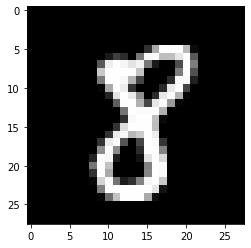

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_test[134].reshape(28,28), cmap='gray')

In [7]:
import numpy as np
prediction = model.predict(x_test[134:135])
print('predictioon score: \n:', prediction[0])
threshold = (prediction>0.5)*1
print('\nThresholded Score:\n',threshold[0])
print('\nPredicted Digit:\n',np.where(threshold == 1)[1][0])

predictioon score: 
: [3.33455455e-06 1.38009229e-04 4.33060573e-04 8.58729647e-04
 1.01089085e-04 1.17586798e-03 5.06392269e-07 1.11820635e-04
 9.96132970e-01 1.04460202e-03]

Thresholded Score:
 [0 0 0 0 0 0 0 0 1 0]

Predicted Digit:
 8


### Applications of CNN

### Ways to Fine tune the model
Feature extraction:
We can use a pre-trained model as a feature extraction mechanism. What we can do is that we can remove the output layer( the one which gives the probabilities for being in each of the 1000 classes) and then use the entire network as a fixed feature extractor for the new data set.

Use the Architecture of the pre-trained model:
What we can do is that we use architecture of the model while we initialize all the weights randomly and train the model according to our dataset again.

Train some layers while freeze others:
Another way to use a pre-trained model is to train is partially. What we can do is we keep the weights of initial layers of the model frozen while we retrain only the higher layers. We can try and test as to how many layers to be frozen and how many to be trained.

The below diagram should help you decide on how to proceed on using the pre trained model in your case

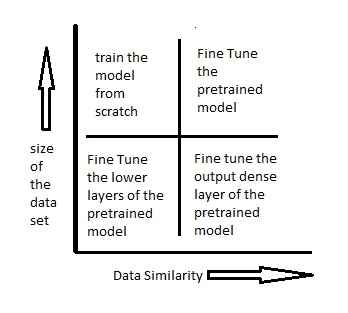



In [8]:
model =  MobileNet (input_shape=None, alpha=0.25,
                   depth_multiplier = 1,
                   dropout = 1e-3,
                   include_top = True,
                   weights = 'imagenet',
                   input_tensor = None,
                   pooling = None,
                   classes = 1000)
model.summary()

Model: "mobilenet_0.25_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 8)       216       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 8)       32        
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 8)       0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 8)       72        
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 8)

### Image Classification

In [12]:
img_path = ('f:work/Cat.jpg')
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

prediction = model.predict(x)
print('Predicted:\n', decode_predictions(prediction))

Predicted:
 [[('n03325584', 'feather_boa', 0.24640879), ('n02098286', 'West_Highland_white_terrier', 0.054859564), ('n02317335', 'starfish', 0.04160241), ('n03884397', 'panpipe', 0.03843622), ('n03388043', 'fountain', 0.035281435)]]


### Extract CNN Features

In [14]:
features = model.predict(x)
print("feature shape:", features.shape)
print("features:", features)


feature shape: (1, 1000)
features: [[1.66889413e-06 7.13698915e-04 1.65777616e-04 1.10444649e-04
  1.78130605e-04 4.26028483e-03 3.12957534e-04 1.41130702e-04
  6.23057858e-05 1.60200301e-07 9.00868599e-07 2.61546138e-05
  8.94298751e-07 1.74004617e-05 5.53145364e-05 3.42093085e-06
  2.29534344e-05 1.24992017e-04 2.50076164e-06 7.43013970e-06
  1.03184959e-06 1.27220934e-04 7.50790059e-06 6.57102501e-05
  2.86812769e-06 1.59370052e-06 5.43642345e-05 5.69003605e-05
  3.04487567e-05 3.72156827e-03 6.52510778e-07 4.07434391e-06
  2.95479776e-06 2.60660295e-06 2.85960618e-06 1.32702780e-06
  5.19302284e-06 2.66798281e-07 3.75395961e-04 9.01980547e-06
  9.18594105e-06 7.87480258e-06 1.11574491e-05 4.63040233e-05
  1.34448292e-05 7.70637143e-06 4.13209127e-05 1.56748953e-04
  1.50156353e-07 1.80128027e-05 6.31858275e-05 3.84683401e-04
  1.07686519e-05 4.20529941e-05 2.18739333e-05 2.58907858e-05
  4.34412286e-05 5.82936707e-07 2.88290175e-05 8.68786447e-06
  9.98510041e-06 1.99286660e-06 6.6

###  Extract features from an arbitrary intermediate layer

In [15]:
model_minimal = Model(input=model.input, output=model.get_layer('conv_dw_2_relu').output)

conv_dw_2_relu_features = model_minimal.predict(x)
print('Features of conv_dw_2_relu:',conv_dw_2_relu_features.shape)

Features of conv_dw_2_relu: (1, 56, 56, 16)


You can extract these features and use the base network as a feature extractor for your problems. 
